In [10]:
import numpy as np

import xml.etree.ElementTree as et

import matplotlib.pyplot as plt

In [2]:
def read_band_data_new_xml(xml_file):
    """
    Reads data from QE bands calculations (new XML)
    Returns:
      - kpts[i_kpt] = [kx, ky, kz] in [2*pi/a] 
      - eigvals[i_kpt, i_band] in [eV]
      - fermi_en in [eV]
    """
    
    data_file_xml = et.parse(xml_file)
    data_file_root = data_file_xml.getroot()

    output_node = data_file_root.find('output')

    # Find fermi
    band_node = output_node.find('band_structure')
    fermi_en = float(band_node.find('fermi_energy').text)*27.21138602
    lsda = band_node.find('spinorbit').text

    kpts = []
    eigvals = []

    for kpt in band_node.findall("ks_energies"):
        k_coords = np.array(kpt.find('k_point').text.split(), dtype=float)
        kpts.append(k_coords)

        eig_vals = np.array(kpt.find('eigenvalues').text.split(), dtype=float)
        eigvals.append(eig_vals*27.21138602)
    kpts = np.array(kpts)
    eigvals = np.array(eigvals)
    
    return kpts, eigvals, fermi_en

In [4]:
xml_file = "/home/kristjan/sshfs/daint_others_scratch/cpi/exercise_11/TASK_5/SI.xml"

In [6]:
kpts, eigvals, fermi_en = read_band_data_new_xml(xml_file)

In [34]:
k_arr = [0.0]

cum_sum = 0.0
for i_k in range(1, len(kpts)):
    k0 = kpts[i_k-1]
    k1 = kpts[i_k]
    dk = k1 - k0
    cum_sum += np.linalg.norm(dk)
    k_arr.append(cum_sum)

In [44]:
x_ticks = {}

for i_k, kpt in enumerate(kpts):
    if all(kpt == np.array([0.0, 0.0, 0.0])):
        x_ticks['G'] = k_arr[i_k]
    if all(kpt == np.array([-0.5, 0.5, 0.5])):
        x_ticks['L'] = k_arr[i_k]
    if all(kpt == np.array([-1.0, 0.0, 0.0])):
        x_ticks['X'] = k_arr[i_k]
        

In [47]:
x_ticks.values()

dict_values([0.0, 0.8660254037844384, 1.8660254037844377])

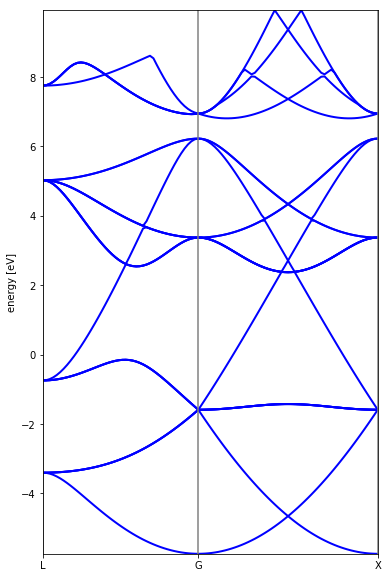

In [56]:
plt.figure(figsize=(6, 10))
plt.plot(k_arr, eigvals, 'b', lw=2.0)
plt.xlim([0.0, np.max(k_arr)])
plt.ylim([np.min(eigvals), np.max(eigvals)])
plt.xticks(list(x_ticks.values()), list(x_ticks.keys()))
for xtick in list(x_ticks.values()):
    plt.axvline(xtick, color='gray')
plt.ylabel("energy [eV]")
plt.show()